<a href="https://colab.research.google.com/github/revathys/AIMLLearn/blob/main/colab_activity13_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Colab Activity 13.3: Using L1 Regularization to Select Features

**Expected Time = 90 minutes**


This activity focuses on using the L1 regularization penalty to select features in a classification setting.  In the following, you will explore the value of different coefficients as you increase regularization.  Be sure to use the `liblinear` solver in your models throughout.

### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV


import seaborn as sns

### The Data

For this exercise you will use the built in dataset from seaborn containing information on passengers on the Titanic.  Here, you will only use the numeric features.  The data is loaded and prepared below.  We will only use one set for `X` and `y` to explore the effect of added regularization.

In [2]:
data = sns.load_dataset('titanic').dropna()

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [4]:
X, y = data.select_dtypes(np.number).drop('survived', axis = 1), data.survived

[Back to top](#-Index)

### Problem 1

#### Scaling the Data


Because we are using regularization, it is important to have each of the features represented on the same scale.  To do so, instantiate a `StandardScaler` scaler and assign it to the `scaler` variable. Next, apply the function `fit_transform` to `scaler` with argument `X` to create `X_scaled` below.  

In [5]:


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### ANSWER CHECK
X_scaled.mean()


# Answer check
X_scaled.mean()

np.float64(4.3920910864291905e-17)

### Problem 2

#### `C` values to explore



Next, you want to create an array of different `C` values to explore.  Remember that `C` is actually the inverse of regularization so small values are large amounts of regularization.  

Below, use a `for` loop to iterate over the values of `Cs`. Inside the `for` loop, instatinate a `LogisticRegression` classifier with L1 penalty, liblinear solver, `random_state=42`, and `max_iter=1000` and assign it to `lgr` and fit it to `X_scaled` and `y`.

Finally, append the coefficients of the model (`lgr.coef_[0]`) as a list to `coef_list`.


In [8]:
Cs = np.logspace(-5, .5)

In [9]:

coef_list = []
for C in Cs:
    lgr = LogisticRegression(C = C, penalty = 'l1', solver = 'liblinear', random_state = 42, max_iter = 1000)
    lgr.fit(X_scaled, y)
    coef_list.append(lgr.coef_[0])



### ANSWER CHECK
coef_list[0]

array([0., 0., 0., 0., 0.])

[Back to top](#-Index)

### Problem 3

#### DataFrame of Coefficients


Next, create a dataframe, `coef_df`, based on the coefficients in `coef_list`.  Set the index of this dataframe to the `Cs` values.  Assign the column names of the new dataframe from the columns of `X`.

In [10]:


coef_df = pd.DataFrame(coef_list, index = Cs, columns = X.columns)



### ANSWER CHECK
coef_df.head()

,pclass,age,sibsp,parch,fare
0.000010,0.0,0.0,0.0,0.0,0.0
0.000013,0.0,0.0,0.0,0.0,0.0
0.000017,0.0,0.0,0.0,0.0,0.0
0.000022,0.0,0.0,0.0,0.0,0.0
0.000028,0.0,0.0,0.0,0.0,0.0


[Back to top](#-Index)

### Problem 4

#### Visualizing the Results



Below, the data from the coefficients is plotted.  Based on this plot, which feature seems more important -- `age` or `parch`?  Assign your answer as a string to `ans4` below.

<center>
    <img src = 'images/coefl1.png' />
</center>

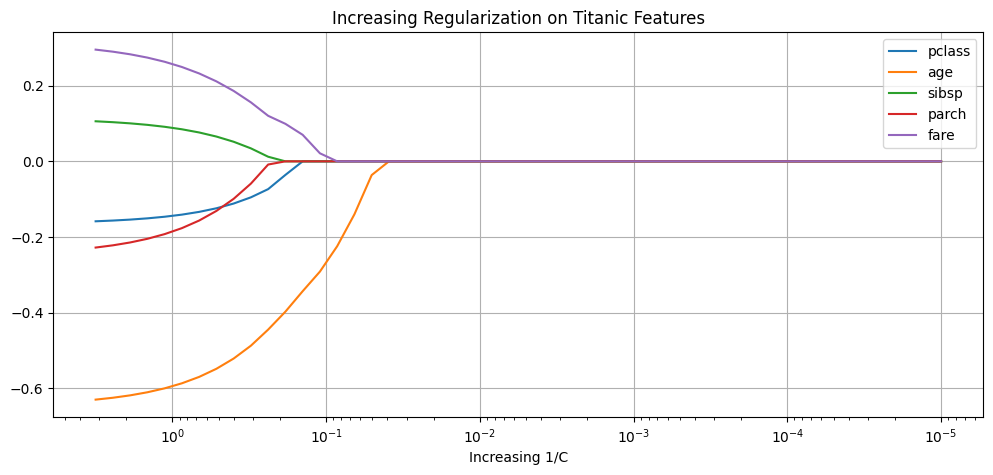

In [15]:
 plt.figure(figsize = (12, 5))
 plt.semilogx(coef_df)
 plt.gca().invert_xaxis()
 plt.grid()
 plt.legend(list(coef_df.columns));
 plt.title('Increasing Regularization on Titanic Features')
 plt.xlabel("Increasing 1/C")
 plt.savefig('images/coefl1.png')

In [16]:


ans4 = 'age'



### ANSWER CHECK
print(ans4)

age


[Back to top](#-Index)

### Problem 5

#### Using `SelectFromModel`



In a similar manner, you can use `SelectFromModel` together with `LogisticRegression` to select features based on coefficient values.  

Below, create an instance of the `SelectFromModel` selector with a `LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear', random_state = 43)` as the estimator and assign it to the `selector` variable.  Use the `fit_transform` function on `selector ` to fit the data `X_scaled` and `y` to select the two most important features.  

Assign their names as a list to `best_features` below.

In [21]:


selector = SelectFromModel(LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear', random_state = 43))
selector.fit_transform(X_scaled, y)
best_features = selector.get_feature_names_out()
print(type(X))
feature_importance = dict(zip(X.columns, best_features))
print(feature_importance)
### ANSWER CHECK
print(selector.get_feature_names_out())

<class 'pandas.core.frame.DataFrame'>
{'pclass': 'x1', 'age': 'x4'}
['x1' 'x4']
